# Errors, Intervals, and CLT

## Standard error: meaning and purpose

The previous example's sample means typically deviate about $0.7$. This is an estimate of the uncertainty on the sample mean. The standard deviation of a statistic's sampling distribution is called __standard error__ of that statistic.

With real data we do not have access to many samples or directly to the sampling distribution of the mean. If we know the standard deviation of the sampling distribution, we could say:

* The sample mean is $177.88 \pm 0.71$ at a $68\%$ (1$\sigma$) confidence level</i>


## Central Limit Theorem

The bell-shape of a sampling distribution is not coincidentally Gaussian, due to the __Central Limit Theorem__ (CLT) which states that:

_the sum of $N$ independent and identically distributed (i.i.d.) random variables tends to the normal distribution as $N \rightarrow \infty$._

According to the CLT, the _standard error of the mean_ (SEM) of an $N$-sized sample from a population with standard deviation $\sigma$ is:

$$SE(\bar{x}) = \frac{\sigma}{\sqrt{N}}$$

When the standard deviation of the population is __unknown__ (the usual case) it can be approximated by the sample standard deviation $s$:

$$SE(\bar{x}) = \frac{s}{\sqrt{N}}$$

### The 68 - 95 - 99.7 rule

The CLT explains the percentages the previous code block returns. These are approximately the areas of the PDF of the normal distribution in the ranges $\left(\mu - k\sigma, \mu + k\sigma\right)$ for $k = 1, 2, 3$.



In [1]:
# Importing Libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
sigmas = [1,2,3]

percentages = []

for sigma in sigmas:
    per = round(stats.norm.cdf(sigma) - stats.norm.cdf(-sigma),3)
    print("For", sigma, "sigma the area of the PDF is ~", per)
    percentages.append(per)

print('')
for per in percentages:
    print("For", per, "% coverage, the interval is", np.round(stats.norm.interval(per), 3))



('For', 1, 'sigma the area of the PDF is ~', 0.683)
('For', 2, 'sigma the area of the PDF is ~', 0.954)
('For', 3, 'sigma the area of the PDF is ~', 0.997)

('For', 0.683, '% coverage, the interval is', array([-1.001,  1.001]))
('For', 0.954, '% coverage, the interval is', array([-1.995,  1.995]))
('For', 0.997, '% coverage, the interval is', array([-2.968,  2.968]))


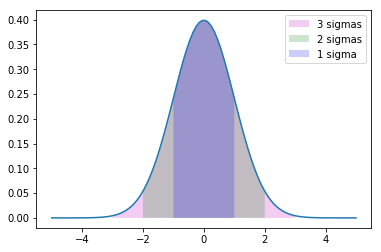

In [26]:
def plotsigma(sig, col):
    x = np.linspace(-sig, sig, 100)
    y = stats.norm.pdf(x)
    text = str(sig) + " sigma" + ("s" if abs(sig) != 1 else "")
    plt.fill_between(x, y, y2=0, facecolor = col, label = text, alpha = 0.2)
    
x = np.linspace(-5, 5, 100)
plt.plot(x, stats.norm.pdf(x))
plotsigma(3, "m")
plotsigma(2, "g")
plotsigma(1, "b")
plt.legend()
plt.show()

## Standard error of the mean from one sample

In real-life applications, we have no access to the sampling distribution. Instead, we get __one sample__ of observations and therefore <b>one point estimate per statistic</b> (e.g. mean and standard deviation.)

### Assuming normality

When $\sigma$ is known, then for various sigma levels $k$:

$$\bar{x} \pm k \frac{\sigma}{\sqrt{N}} \qquad \equiv \qquad \bar{x} \pm k \times SE\left(\bar{x}\right)$$

which correspond to confidence levels equal to the area of the standard normal distribution between values $\left(-k, k\right)$:

$$ C = Pr(-k < z < k) \Longrightarrow C = \Phi(k) - \Phi(-k)$$

where $z \sim \mathcal{N}\left(0, 1\right)$ and $\Phi(z)$ is the CDF of standard normal distribution.

### Assuming normality: t-Student approximation

When $\sigma$ is unknown, then the uncertainty of $s$ should be accounted for using the <b>Student's t approximation</b>. For large samples ($N > 30$) this is not necessary as the t-distribution is well approximated by normal distribution. If we decide to use it, then for the sample mean the following formula holds:

$$\bar{x} \pm t_c\left(\frac{a}{2}, N-1\right) \frac{s}{\sqrt{N}} \qquad \equiv \qquad \bar{x} \pm t_c \times SE\left(\bar{x}\right)$$

where $N$ is the sample size and $t_c$ is a critical value that depends on the requested significance level $a$ or equivalently the confidence level $C = 1-a$, and the degrees of freedom (here $N-1$):

$$Pr(-t_c < t < t_c) = 1 - a = C$$

The critical value is actually the inverse CDF of the $t$-distribution with $N-1$ d.o.f., evaluated at $\frac{a}{2}$.

### A common misconception...

The probability of the true parameter to lie inside the confidence interval produced from a sample is <b>not</b> equal to $68\%$: <b>it either contains it or not</b>.

Instead, $68\%$ is the probability for a sample from the same distribution and under the same circumstances, to produce a confidence interval containing the true mean. E.g. out of 1000 samples we expect that $\approx 680$ of the $1\sigma$ CIs will contain the sample mean.


# Confidence intervals

<ul>
    <li>
    A <i><b>confidence interval</b></i> is an estimate of the range of a parameter of a population (in contrast to point estimates.)
    </li>
    <li>
    A <i><b>condifence interval</b></i> is an interval with random endpoints which contains the parameter of interest with a specified probability $C$ called <i>confidence level
    </i></li>
</ul>

It is closely related to <i>hypothesis testing</i>: confidence level is the complement of significance level: $C = 1 - a$.


## Parametric

If the sampling distribution is either known or assumed (e.g. normal from CLT), then deriving the interval at a confidence level $C$ is straightforward:
<ul>
    <li>each endpoint corresponds to a value for the CDF: $p_1 = \frac{1 - C}{2}$ and $p_2 = \frac{1 + C}{2}$</li>
    <li>find the percentiles $x_1$, $x_2$: the values for which $F(x_i) = p_i \Longrightarrow x_i = F^{-1}(p_i)$ where $F(x)$ is the CDF of the samlping distribution.
    <li>the confidence interval is $(x_1, x_2)$</li>
    <li>if $\hat{x}$ is the point estimate of the parameter of interest then we can write down all three values in the format: $\hat{x}_{x_1 - \hat{x}}^{x_2 - \hat{x}}$. Also, we shall <b>always</b> state the confidence level.
</ul>

### Confidence bounds

Similarily, we can get <b>one-sided</b> limits. At a confidence level $C$ the lower/upper confidence bounds from a distribution with CDF $F(x)$ are:

<ul>
<li> upper: $F^{-1}(C)$ corresponding to the interval $\left[F^{-1}(0), \, F^{-1}(C)\right]$ </li>
<li> lower: $F^{-1}(1-C)$ corresponding to the interval $\left[F^{-1}(1-C), \, F^{-1}(1)\right]$ </li>
</ul>

For example, if $F(x)$ is the CDF of the standard normal distribution, then $F(-1) \approx 0.16$ and $F(1) \approx 0.84$. Therefore:

<ul>
<li>$1$ is the upper $84\%$ confidence bound</li>
<li>$-1$ is the lower $84\%$ confidence bound</li>
</ul>

### Example

Let's assume that we did the math and found that the sampling distribution of our parameter is the <i>exponential power distribution</i> with shape parameter $b = 3.8$. Then the confidence intervals at various levels would be assymetric:

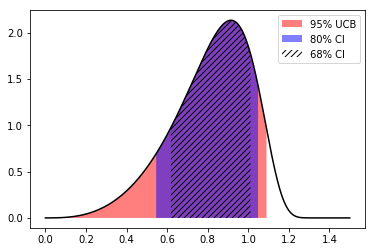

In [44]:
dist = stats.exponpow(3.8)
# dist = stats.norm(0,10)
ci68 = dist.interval(0.68)             # using .interval() method
ci80 = [dist.ppf(0.1), dist.ppf(0.9)] # ...or using percentile point function
cb95 = [dist.ppf(0), dist.ppf(0.95)]  # ...which is handy for one-sided intervals
# ci95 = dist.interval(0.95)             # using .interval() method

x = np.linspace(0, 1.5, 400); y = dist.pdf(x) # total distr
x68 = np.linspace(ci68[0], ci68[1]); y68 = dist.pdf(x68) # 68% conf interval
x80 = np.linspace(ci80[0], ci80[1]); y80 = dist.pdf(x80) # 80% ...
x95 = np.linspace(cb95[0], cb95[1]); y95 = dist.pdf(x95) # 95% ...
plt.plot(x, y, "k-")
plt.fill_between(x95, y95, 0 * y95, alpha = 0.5, label = "95% UCB", facecolor = "r")
plt.fill_between(x80, y80, 0 * y80, alpha = 0.5, label = "80% CI", facecolor = "b")
plt.fill_between(x68, y68, 0 * y68, alpha = 0.0, label = "68% CI", hatch = "////")
plt.legend()
plt.show() 

## Non-parametric

For the sample mean, the standard error is well defined and performs quite well for most cases. Though, we may want to compute the standard error of other parameters for which the <b>sampling distribution is either unknown or difficult to compute</b>.

There are various methods for the <b>non-parametric</b> estimation of the standard error / confidence interval. Here we will see two such methods: <b>bootstrap</b> and <b>jackknife</b>.

### Bootstrap

Bootsrapping is a resampling (with replacement) method. As we saw before, by drawing many samples we can approximate the sampling distribution of the mean which is impossible for real data without the assumption of a distribution.

Bootstrap method is based on randomly constructing $B$ samples from the original one, by sampling with replacement from the latter. The size of the resamples should be equal to the size of the original sample. For example, with the sample $X$ below, we can create $B = 5$ new samples $Y_i$:

$$X = \left[1, 8, 3, 4, 7\right]$$

$$\begin{align}
Y_1 &= \left[8, 3, 3, 7, 1\right] \\
Y_2 &= \left[3, 1, 4, 4, 1\right] \\
Y_3 &= \left[3, 7, 1, 8, 7\right] \\
Y_4 &= \left[7, 7, 4, 3, 1\right] \\
Y_5 &= \left[1, 7, 8, 3, 4\right]
\end{align}$$

Then, we compute the desired sample statistic for each of those samples to form an empirical sampling distribution. The standard deviation of the $B$ sample statistics is the bootstrap estimate of the standard error of the statistic.

#### Example: Standard Error (SE) of the median and skewness

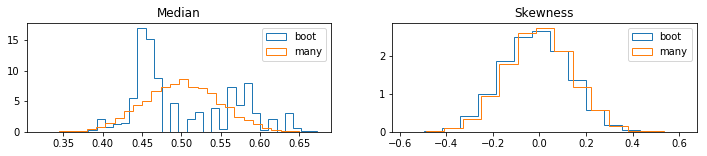

('SE median (if normal)   :', 0.036180062727913381)
('SE median (bootstrap)   :', 0.064503970077213618)
('SE median (many samples):', 0.048322770690668815)
-----------------------------------------
('SE skewness (if normal)   :', 0.0)
('SE skewness (bootstrap)   :', 0.14335553308620713)
('SE skewness (many samples):', 0.14147599780486195)


In [63]:
N = 100   # size of sample
M = 10000 # no of samples drawn from the distr.
B = 10000 # no of bootstrap resample drawn from a signle sample of the distr.

# Various distributions to be tested
# dist = stats.norm(0, 1)
dist = stats.uniform(0, 1)
# dist = stats.cauchy()
#dist = stats.dweibull(8.5)

many_samples = dist.rvs([M, N]) # this creates many sample of the same distr.
m_many = np.median(many_samples, axis = 1)
s_many = stats.skew(many_samples, axis = 1)

boot_samples = np.random.choice(sample, (B, N), replace = True) # this creates bootstrapped samples of one single sample
m_boot = np.median(boot_samples, axis = 1)
s_boot = stats.skew(boot_samples, axis = 1)

m_norm = np.sqrt(np.pi / (2.0 * N)) * dist.std() # this is the calculation if we assume a normal distribution
s_norm = np.sqrt(6 * N * (N - 1) / ((N + 1) * (N - 2) * (N + 3)))

plt.figure(figsize = [12, 2])
plt.subplot(1, 2, 1)
plt.hist(m_boot, 30, histtype = "step", normed = True, label = "boot")
plt.hist(m_many, 30, histtype = "step", normed = True, label = "many")
plt.title("Median")
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(s_boot, 15, histtype = "step", normed = True, label = "boot")
plt.hist(s_many, 15, histtype = "step", normed = True, label = "many")
plt.title("Skewness")
plt.legend()
plt.show()

print("SE median (if normal)   :", m_norm)
print("SE median (bootstrap)   :", np.std(m_boot))
print("SE median (many samples):", np.std(m_many))
print("-----------------------------------------")
print("SE skewness (if normal)   :", s_norm)
print("SE skewness (bootstrap)   :", np.std(s_boot))
print("SE skewness (many samples):", np.std(s_many))

We can see that the many samples drawn from the initial distribution have always Gaussian distribution of means due to CLT. However, this is not the case for the bootstrapped method, which however performs quite well. This is the reason we may use bootstrapping, when we don't know or don't expect that distribution to be normal.

### Jackknife resampling

This older method inspired the Bootstrap which can be seen as a generalization (Jackknife is the linear approximation of Bootstrap.) It estimates the sampling distribution of a parameter on an $N$-sized sample through a collection of $N$ sub-samples by removing one element at a time.

E.g. the sample $X$ leads to the <b>Jackknife samples</b> $Y_i$:

$$ X = \left[1, 7, 3\right] $$

$$
\begin{align}
Y_1 &= \left[7, 3\right] \\
Y_2 &= \left[1, 3\right] \\
Y_3 &= \left[1, 7\right]
\end{align}
$$

The <b>Jackknife Replicate</b> $\hat\theta_{\left(i\right)}$ is the value of the estimator of interest $f(x)$ (e.g. mean, median, skewness) for the $i$-th subsample and $\hat\theta_{\left(\cdot\right)}$ is the sample mean of all replicates:

$$
\begin{align}
\hat\theta_{\left(i\right)} &= f\left(Y_i\right) \\
\hat\theta_{\left(\cdot\right)} &= \frac{1}{N}\sum\limits_{i=1}^N {\hat\theta_{\left(i\right)}}
\end{align}
$$

and the <b>Jackknife Standard Error</b> of $\hat\theta$ is computed using the formula:
 
$$ SE_{jack}(\hat\theta) = \sqrt{\frac{N-1}{N}\sum\limits_{i=1}^N \left[\hat{\theta}\left(Y_i\right) - \hat\theta_{\left(\cdot\right)} \right]^2} = \cdots = \frac{N-1}{\sqrt{N}} s$$

where $s$ is the standard deviation of the replicates.

#### Example: estimation of the standard error of the mean

In [64]:
N = 100 
M = 100

# Distributions to be tested
#dist = stats.norm(0, 1)
dist = stats.uniform(0, 1)
#dist = stats.cauchy()
#dist = stats.dweibull(8.5)

def jackknife(x):
    return [[x[j] for j in range(len(x)) if j != i] for i in range(len(x))]
# Be careful the aboe is a double loop: first for i and then for j

sample = dist.rvs(N)
SE_clt = np.std(sample) / np.sqrt(N)

many_samples = dist.rvs([M, N])
many_means = np.mean(many_samples, axis = 1)
many_medians = stats.kurtosis(many_samples, axis = 1)
SE_mean_many = np.std(many_means)
SE_median_many = np.std(many_medians)

jack_samples = jackknife(sample)
jack_means = np.mean(jack_samples, axis = 1)
jack_medians = stats.kurtosis(jack_samples, axis = 1)
SE_mean_jack = np.std(jack_means) * (N - 1.0) / np.sqrt(N)
SE_median_jack = np.std(jack_medians) * (N - 1.0) / np.sqrt(N)

print("[ Standard error of the mean ]")
print("    SEM formula  :", SE_clt)
print("    Jackknife    :", SE_mean_jack)
print("    Many samples :", SE_mean_many)
print("\n[Standard error of the median ]")
print("    Jackknife    :", SE_median_jack)
print("    Many samples :", SE_median_many)

[ Standard error of the mean ]
('    SEM formula  :', 0.029713229319835173)
('    Jackknife    :', 0.029713229319835111)
('    Many samples :', 0.027021166426376305)

[Standard error of the median ]
('    Jackknife    :', 0.12885958726617672)
('    Many samples :', 0.10724818607554371)


# Propogation of Uncertainty

Let's very briefly introduce the general cases, for completeness. This will be followed by the specific case used typically by engineers and physical scientists, which is perhaps of most interest to us.

## 1) Linear Combinations
For $\big\{{f_k(x_1,x_2,\dots,x_n)}\big\}$, a set of $m$ functions that are linear combinations of $n$ variables $x_1,x_2,\dots,x_3$ with combination coefficients $A_{k1},A_{k2},\dots,A_{kn},k=1 \dots m$.

$\large{f_k=\sum\limits_{i=1}^{n} A_{ki}x_i}$ or $\large{f=Ax}$

From here, we would formally write out the $\textbf{variance-covariance matrix}$, which deals with the correlation of uncertainties across variables and functions, and contains many $\sigma$'s. Each covariance term $\sigma_{ij}$ may be expressed in terms of a $\textbf{correlation coefficient}$ $\rho_{ij}$ as $\sigma_{ij}=\rho_{ij}\sigma_{i}\sigma_{j}$.

In our most typical case, where variables are uncorrelated, the entire matrix may be reduced to:

$\large{\sigma^{2}_{f} = \sum\limits_{i=1}^{n} a^{2}_{i}\sigma^{2}_{i}}$

This form will be seen in the most likely applicable case for astronomers below.

## 2) Non-linear Combinations

When $f$ is a non-linear combination of the variables $x$, $f$ must usually be linearized by approximation to a first-order Taylor series expansion:

$\large{f_k=f^{0}_{k}+\sum\limits^{n}_{i} \frac{\partial f_k}{\partial x_i} x_i}$

where $\large{\frac{\partial f_k}{\partial x_i}}$ denotes the partial derivative of $f_k$ with respect to the $i$-th variable.

### Simplification

If we neglect correlations, or assume the variables are independent, we get the commonly used formula for analytical expressions:

$\large{\sigma^{2}_{f}=\big(\frac{\partial f}{\partial x}\big)^{2}\sigma^{2}_{x}+\big(\frac{\partial f}{\partial y}\big)^{2}\sigma^{2}_{y}+\dots}$

where $\sigma_f$ is the standard deviation of the function $f$, with $\sigma_x$ being the standard deviation of the variable $x$ and so on.

This formula is based on the assumption of the linear characteristics of the gradient of $f$, and is therefore only a good estimation as long as the standard deviations are small compared to the partial derivatives.

### Example: Mass Ratio

The mass ratio for a binary system may be expressed as:

$\large{q=\frac{K_1}{K_2}=\frac{M_2}{M_1}}$

where K's denote the velocity semiamplitudes (from a Keplerian fit to the radial velocities) and M's represent the individual component masses.

Inserting this into the formula gives:

$\large{\sigma^{2}_{q}=\big(\frac{\partial q}{\partial K_1}\big)^{2}\sigma^{2}_{K_1}+\big(\frac{\partial q}{\partial K_2}\big)^{2}\sigma^{2}_{K_2}}$

$\large{\sigma^{2}_{q}=\big(\frac{1}{K_2}\big)^{2}\sigma^{2}_{K_1}+\big(\frac{K_1}{K_2^2}\big)^{2}\sigma^{2}_{K_2}}$

For a simple application of such a case, let's use the values of velocity semiamplitudes for the early-type B binary HD 42401 from Williams (2009):

$K_1=151.4\pm0.3$ km s$^{-1}$

$K_2=217.9\pm1.0$ km s$^{-1}$

Inserting these into the equations and computing the value, we get:

$q=0.6948\pm0.0038$

## 3) Monte Carlo sampling

An uncertainty $\sigma_x$ expressed as a standard error of the quantity $x$ implies that we could treat the latter as a normally distributed random variable: $X \sim \mathcal{N}\left(x, \sigma_x^2\right)$. By sampling $M$ times each variable $x_i$ and computing $f$ we are experimentaly exploring the different outcomes $f$ could give.

### 1) Example

The following code computes the mass ratio for HD 42401 and its uncertainty using uncertainty propagation and Monte Carlo sampling. For better comparison, we print 6 digits after decimal point.

('From error propagation formula: q =', 0.694814, '+/-', 0.003473)
('From monte carlo samlping:      q =', 0.694802, '+/-', 0.003494)


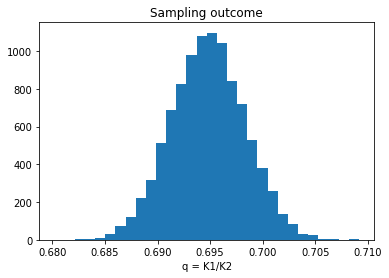

In [69]:
# observed quantities
K1 = 151.4
K2 = 217.9
K1_err = 0.3
K2_err = 1.0

# Error propagation
q = round(K1 / K2, 6)
q_err = round(np.sqrt((K1_err / K2) ** 2.0 + (K2_err * K1 / K2 ** 2.0) ** 2.0), 6)

# Monte Carlo sampling
N = 10000
K1_sample = stats.norm.rvs(K1, K1_err, N)
K2_sample = stats.norm.rvs(K2, K2_err, N)
q_sample = K1_sample / K2_sample
q_mean = round(np.mean(q_sample), 6)
q_std = round(np.std(q_sample), 6)
# q_CI95 = np.percentile(q_sample, [0.025, 0.975])
print("From error propagation formula: q =", q, "+/-", q_err)
print("From monte carlo samlping:      q =", q_mean, "+/-", q_std)
plt.hist(q_sample, 30)
plt.title("Sampling outcome")
plt.xlabel("q = K1/K2")
plt.show()

### 2) Example 

Estimates of the true distance modulus and the radial velocity of NGC 2544 are (unpublished galaxy catalog):

$$
\begin{align}
(m - M)_0 &= 33.2 \pm 0.5 \\
v &= \left(3608 \pm 271\right) \text{km/s}
\end{align}
$$

Applying the Hubble's Law for this object leads to the following formul&aelig; and values:

$$
\begin{align}
H_0 &= \frac{v}{r} = \frac{v}{10^{0.2 m - 5}} = 82.7 \, \text{km}\,\text{s}^{-1}\,\text{Mpc}^{-1}\\
\sigma_{H_0}^2 &= \left(\frac{1}{10^{0.2 m - 5}}\right)^2\left[\sigma_v^2 + \left(\frac{\ln{10}}{5}v \times \sigma_m \right)^2\right] = 20.0 \, \text{km}\,\text{s}^{-1}\,\text{Mpc}^{-1}
\end{align}
$$

But can we trust the uncertainty propagation formula for distance moduli? Due to the <b>logarithmic nature</b> of distance modulus, a change by $\Delta\left(m-M\right)_0$ translates into multiplying/dividing the distance by a value close to $1$. Let alone, distance is always positive.

Applying the uncertainty propagation formula and the sampling method we get:

('Error propagation  : H0 =', 82.655, '+/-', 20.019)
('Monte Carlo : H0 =', 84.904, '+/-', 20.882)


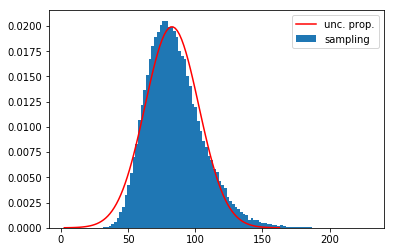

In [80]:
m = 33.2
m_err = 0.5
v = 3608
v_err = 271

# Estimate with formula and error propagation
H0 = v / 10.0 ** (0.2 * m - 5.0)
H0_err = np.sqrt(v_err ** 2.0 + (np.log(10.0) / 5.0 * v * m_err) ** 2.0) / 10.0 ** (0.2 * m - 5.0)
print("Error propagation  : H0 =", round(H0, 3), "+/-", round(H0_err, 3))

# Estimate with sampling
N = 100000
m_sample = stats.norm.rvs(m, m_err, N)
v_sample = stats.norm.rvs(v, v_err, N)
H0_sample = v_sample / (10.0 ** (0.2 * m_sample - 5.0))
H0_mean = np.mean(H0_sample)
print("Monte Carlo : H0 =", round(H0_mean, 3), "+/-", round(np.std(H0_sample), 3))

# Plot Monte-Carlo
plt.hist(H0_sample, 100, normed = True, label = "sampling")
# and plot the formula
x = np.linspace(H0 - 4 * H0_err, H0 + 4 * H0_err, 100)
plt.plot(x, stats.norm.pdf(x, H0, H0_err), "r-", label = "unc. prop.")
plt.legend()
plt.show()